# Data Cleaning

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv('diabetes.csv')
print(df.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [3]:
#ROWS AND COLUMNS IN DATASET
df.shape

(768, 9)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
df["SkinThickness"]=df["SkinThickness"].replace(0,df["SkinThickness"].mean())

In [7]:
df["Insulin"]=df["Insulin"].replace(0,df["Insulin"].mean())

In [8]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35.000000,79.799479,33.6,0.627,50,1
1,1,85,66,29.000000,79.799479,26.6,0.351,31,0
2,8,183,64,20.536458,79.799479,23.3,0.672,32,1
3,1,89,66,23.000000,94.000000,28.1,0.167,21,0
4,0,137,40,35.000000,168.000000,43.1,2.288,33,1


In [9]:
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [10]:
df.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,25.373135,106.457354,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,28.907494,141.426597,35.142537,0.550500,37.067164


                          Pregnancies   Glucose  BloodPressure  SkinThickness  \
Pregnancies                  1.000000  0.129459       0.141282       0.013376   
Glucose                      0.129459  1.000000       0.152590       0.145378   
BloodPressure                0.141282  0.152590       1.000000       0.180890   
SkinThickness                0.013376  0.145378       0.180890       1.000000   
Insulin                     -0.018082  0.390835       0.074858       0.240361   
BMI                          0.017683  0.221071       0.281805       0.501131   
DiabetesPedigreeFunction    -0.033523  0.137337       0.041265       0.154961   
Age                          0.544341  0.263514       0.239528       0.026423   
Outcome                      0.221898  0.466581       0.065068       0.175026   

                           Insulin       BMI  DiabetesPedigreeFunction  \
Pregnancies              -0.018082  0.017683                 -0.033523   
Glucose                   0.390835  0.221

<AxesSubplot:>

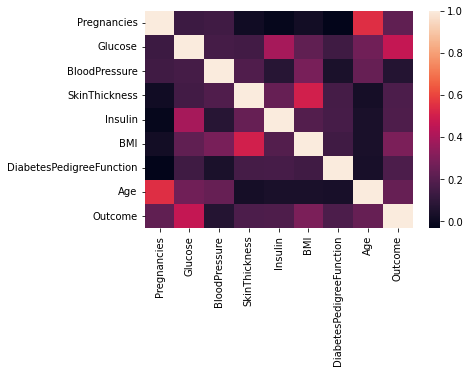

In [11]:
corr = df.corr()
print(corr)
sns.heatmap(corr, 
         xticklabels=corr.columns, 
         yticklabels=corr.columns)

# Visualization and removing outcast data

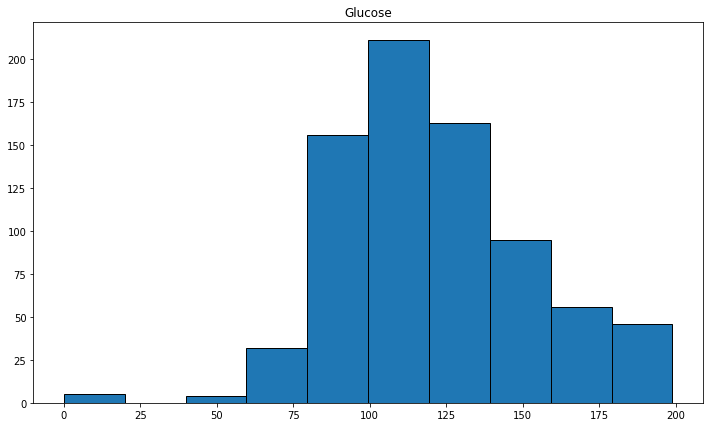

In [12]:
plt.figure(figsize = (12,7))
plt.hist("Glucose", data=df , edgecolor = "k")
plt.title("Glucose")
plt.show()

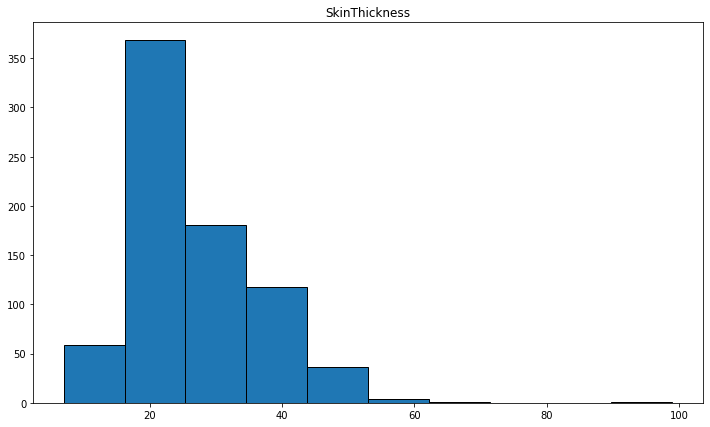

In [13]:
plt.figure(figsize = (12,7))
plt.hist("SkinThickness", data=df , edgecolor = "k")
plt.title("SkinThickness")
plt.show()

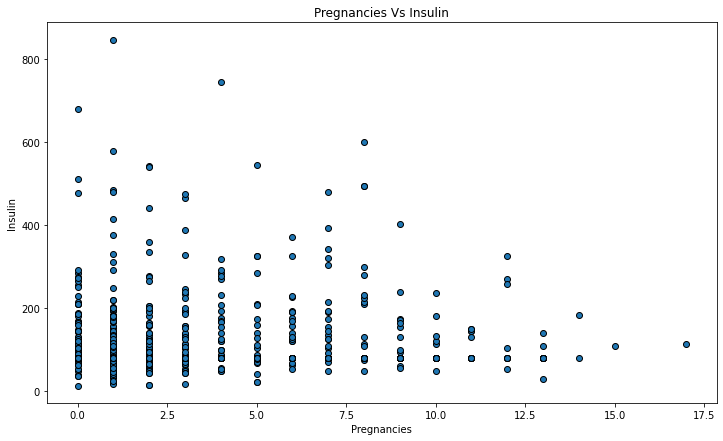

In [14]:
plt.figure(figsize = (12,7))
plt.scatter("Pregnancies","Insulin", data=df , edgecolor = "k")
plt.title("Pregnancies Vs Insulin")
plt.xlabel("Pregnancies")
plt.ylabel("Insulin")
plt.show()

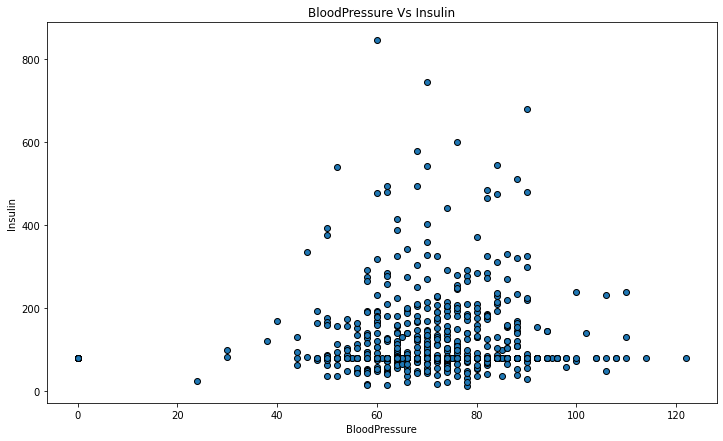

In [15]:
plt.figure(figsize = (12,7))
plt.scatter("BloodPressure","Insulin", data=df , edgecolor = "k")
plt.title("BloodPressure Vs Insulin")
plt.xlabel("BloodPressure")
plt.ylabel("Insulin")
plt.show()

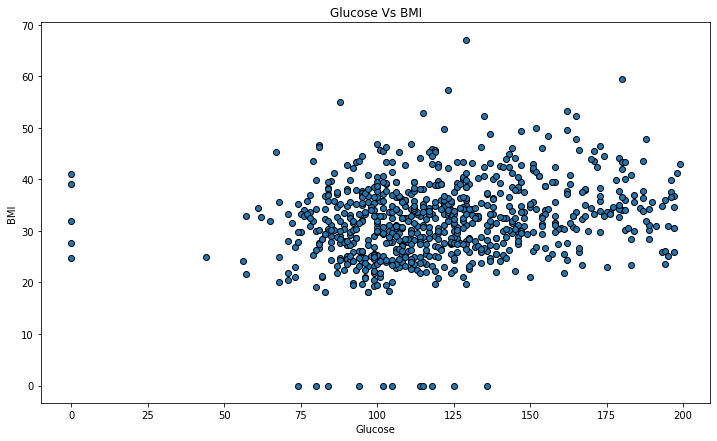

In [16]:
plt.figure(figsize = (12,7))
plt.scatter("Glucose","BMI", data=df , edgecolor = "k")
plt.title("Glucose Vs BMI")
plt.xlabel("Glucose")
plt.ylabel("BMI")
plt.show()

# Removing the outcasts


In [17]:
def remove_outcast(dataFrame):
    for column_name in dataFrame.columns:
        Q1 =df[column_name].quantile(0.25)
        Q3 =df[column_name].quantile(0.75)
        IQR=Q3-Q1
        lower_limit=Q1 - 1.5*IQR
        upper_limit=Q3 + 1.5*IQR
        print(f"{column_name}>> Lower Limit: {lower_limit} \n Upper Limit: {upper_limit} ")
        dataFrame= dataFrame[(dataFrame[column_name]> lower_limit)|(dataFrame[column_name] < upper_limit)]
    return dataFrame

In [18]:
df = remove_outcast(df)

Pregnancies>> Lower Limit: -6.5 
 Upper Limit: 13.5 
Glucose>> Lower Limit: 37.125 
 Upper Limit: 202.125 
BloodPressure>> Lower Limit: 35.0 
 Upper Limit: 107.0 
SkinThickness>> Lower Limit: 3.341145833333332 
 Upper Limit: 49.1953125 
Insulin>> Lower Limit: 8.623697916666671 
 Upper Limit: 198.42578125 
BMI>> Lower Limit: 13.35 
 Upper Limit: 50.550000000000004 
DiabetesPedigreeFunction>> Lower Limit: -0.32999999999999996 
 Upper Limit: 1.2 
Age>> Lower Limit: -1.5 
 Upper Limit: 66.5 
Outcome>> Lower Limit: -1.5 
 Upper Limit: 2.5 


In [19]:
df


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35.000000,79.799479,33.6,0.627,50,1
1,1,85,66,29.000000,79.799479,26.6,0.351,31,0
2,8,183,64,20.536458,79.799479,23.3,0.672,32,1
3,1,89,66,23.000000,94.000000,28.1,0.167,21,0
4,0,137,40,35.000000,168.000000,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48.000000,180.000000,32.9,0.171,63,0
764,2,122,70,27.000000,79.799479,36.8,0.340,27,0
765,5,121,72,23.000000,112.000000,26.2,0.245,30,0
766,1,126,60,20.536458,79.799479,30.1,0.349,47,1


In [23]:
df = pd.read_csv('diabetes.csv')
df1 = df[df >1]
df1.to_csv('data.csv')